<a href="https://colab.research.google.com/github/rinoa25/MachineLearning_Final48/blob/main/MachineLearning_Final48.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Submission Details
```
# Final Project Group 48
# Rinoa Malapaya 100743955
# Noshin Rahman 100745332
# Reference: https://www.python-graph-gallery.com/scatterplot-with-regression-fit-in-matplotlib
# Reference: https://www.youtube.com/watch?v=RehA-5OjTN4
# Reference: https://stackabuse.com/python-check-if-string-contains-substring/
# Reference: https://pbpython.com/categorical-encoding.html
# 2021-11-11
```

In [ ]:
# Imported Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

In [ ]:
# URL of the dataset
url = 'https://raw.githubusercontent.com/rinoa25/MachineLearning_Final48/main/top100_kdrama.csv'

# Downloads the dataset directly from the URL provided
data = pd.read_csv(url)

In [ ]:
# Drops the Name, Aired Date, Synopsis, Cast, Genre, Tags, Rank attributes
# Reasoning: The categorical attributes contained a large range of values and are thus difficult to to convert ot a integer representation 
data.drop('Name', axis='columns', inplace=True)
data.drop('Aired Date', axis='columns', inplace=True)
data.drop('Synopsis', axis='columns', inplace=True)
data.drop('Cast', axis='columns', inplace=True)
data.drop('Genre', axis='columns', inplace=True)
data.drop('Tags', axis='columns', inplace=True)
data.drop('Rank', axis='columns', inplace=True)

In [ ]:
# Categorical attributes that weren't dropped are now converted to an integer representation
data['AirDayCode'] = pd.factorize(data["Aired On"])[0]
data['NtwrkCode'] = pd.factorize(data['Network'])[0]
data['ContRateCode'] = pd.factorize(data['Content Rating'])[0]

# If the value for the duration is longer than an hour, replace with 1. If it is less than an hour, replace with 0
data["Duration"] = np.where(data["Duration"].str.contains("hr"), 1, 0)

In [ ]:
# Modified dataset is now called "newdata"
newdata = data.select_dtypes(include=['int64','float64']).copy()

In [ ]:
# Splits the data into 50% training and 50% test sets
train, test = train_test_split(newdata, test_size=0.5)

In [ ]:
# Prepares the data
train_labels = train.iloc[:,-1]
train_data = train.drop(['Rating'], axis=1)
test_labels = test.iloc[:,-1]
test_data = test.drop(['Rating'], axis=1)

In [ ]:
# For multiclass classification, we will use 'Rating' as the target
train_labels_mc = train['Rating']
test_labels_mc = test['Rating']

In [ ]:
# Standardize / scale data so it has mean = 0 and variance = 1
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(train_data)

In [ ]:
# Fit a K-Means clustering and see its performance
k_means = KMeans(n_clusters=8, max_iter=100, init='random')
k_means.fit(train_data)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=100, n_clusters=8,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [ ]:
# K_Means Mean Squared Error
data_predictions = k_means.predict(test_data)
k_mse = mean_squared_error(test_labels, data_predictions)
k_rmse = np.sqrt(k_mse)
print('K_Means rmse =', k_rmse)

K_Means rmse = 3.0919249667480613


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(train_data, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
data_predictions = lin_reg.predict(test_data)
lin_mse = mean_squared_error(test_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)
print('linear regression rmse =', lin_rmse)

linear regression rmse = 1.4015619913860815


In [ ]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[6]),
keras.layers.BatchNormalization(),
keras.layers.Dense(15, activation="elu"),
keras.layers.Dropout(rate=0.5),
keras.layers.Dense(10, activation="softmax")
])

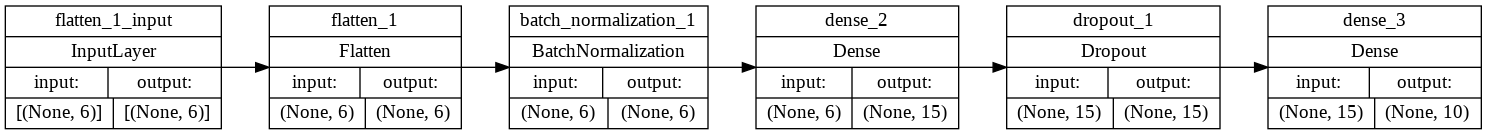

In [ ]:
keras.utils.plot_model(model, "model.png", show_shapes=True, rankdir='LR') # Try removing rankdir = 'LR'

In [ ]:
opt = keras.optimizers.RMSprop(learning_rate=0.01,
    rho=0.09,
    momentum=0.1,
    epsilon=1e-07)
model.compile(loss="mean_squared_error",
optimizer= opt,
metrics=["mse"])

In [ ]:
history = model.fit(train_data, train_labels_mc, epochs=10, validation_data=(test_data, test_labels_mc), verbose=1)

Epoch 1/10
2/2 [==============================] - 1s 190ms/step - loss: 73.6838 - mse: 73.6838 - val_loss: 74.4988 - val_mse: 74.4988
Epoch 2/10
2/2 [==============================] - 0s 27ms/step - loss: 73.6836 - mse: 73.6836 - val_loss: 74.4988 - val_mse: 74.4988
Epoch 3/10
2/2 [==============================] - 0s 26ms/step - loss: 73.6818 - mse: 73.6818 - val_loss: 74.4988 - val_mse: 74.4988
Epoch 4/10
2/2 [==============================] - 0s 23ms/step - loss: 73.6807 - mse: 73.6807 - val_loss: 74.4988 - val_mse: 74.4988
Epoch 5/10
2/2 [==============================] - 0s 36ms/step - loss: 73.6810 - mse: 73.6810 - val_loss: 74.4988 - val_mse: 74.4988
Epoch 6/10
2/2 [==============================] - 0s 23ms/step - loss: 73.6801 - mse: 73.6801 - val_loss: 74.4988 - val_mse: 74.4988
Epoch 7/10
2/2 [==============================] - 0s 23ms/step - loss: 73.6799 - mse: 73.6799 - val_loss: 74.4985 - val_mse: 74.4985
Epoch 8/10
2/2 [==============================] - 0s 31ms/step - los

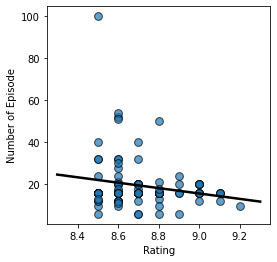

In [ ]:
# Since linear regression has the best performing algorithm (lowest mse), here's our first comparative graph between number of eps vs show ratings
# Result: Kdramas that had small amount of episodes achieved better show ratings than shows that had a large amount of episodes
x = newdata['Rating']
y = newdata['Number of Episode']
fig, ax = plt.subplots(figsize = (4, 4))
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")
ax.set_ylabel('Number of Episode')
ax.set_xlabel('Rating')
b, a = np.polyfit(x, y, deg=1) 
xseq = np.linspace(8.3, 9.3, num=100)
ax.plot(xseq, a + b * xseq, color="k", lw=2.5);

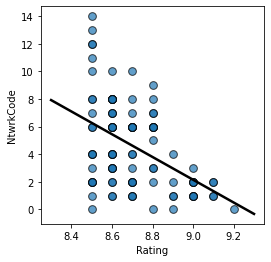

In [ ]:
# Since linear regression has the best performing algorithm (lowest mse), here's our second comparative graph between korean TV networks vs show ratings
# Result: Most networks were able to achieve at least 8.5 show ratings on the shows they hosted, however networks represented by smaller codes (0 - 4) has better show ratings than networks with a larger code
x = newdata['Rating']
y = newdata['NtwrkCode']
fig, ax = plt.subplots(figsize = (4, 4))
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")
ax.set_ylabel('NtwrkCode')
ax.set_xlabel('Rating')
b, a = np.polyfit(x, y, deg=1) 
xseq = np.linspace(8.3, 9.3)
ax.plot(xseq, a + b * xseq, color="k", lw=2.5);

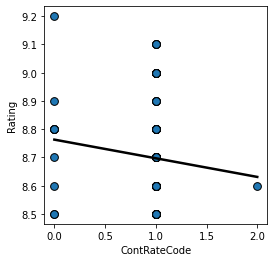

In [ ]:
# Since linear regression has the best performing algorithm (lowest mse), here's our third comparative graph between content ratings vs show ratings
# Result: Shows with a content rating represented by smaller numbers (0, 1) is able to achieve high show ratings, while content ratings represented by a higher number (2) finds difficult success in obtaining a high show ratings
y = newdata['Rating']
x = newdata['ContRateCode']
fig, ax = plt.subplots(figsize = (4, 4))
ax.scatter(x, y, s=60, edgecolors="k")
ax.set_xlabel('ContRateCode')
ax.set_ylabel('Rating')
b, a = np.polyfit(x, y, deg=1) 
xseq = np.linspace(0, 2)
ax.plot(xseq, a + b * xseq, color="k", lw=2.5);

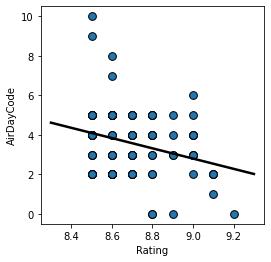

In [ ]:
# Since linear regression has the best performing algorithm (lowest mse), here's our last comparative graph between airing days vs show ratings
# Result: Shows with an airday code represented by smaller numbers (0, 6) is able to achieve high show ratings, while airday code represented by a higher number (7-10) finds difficult success in obtaining a high show ratings
x = newdata['Rating']
y = newdata['AirDayCode']
fig, ax = plt.subplots(figsize = (4, 4))
ax.scatter(x, y, s=60, edgecolors="k")
ax.set_ylabel('AirDayCode')
ax.set_xlabel('Rating')
b, a = np.polyfit(x, y, deg=1) 
xseq = np.linspace(8.3, 9.3)
ax.plot(xseq, a + b * xseq, color="k", lw=2.5);